In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(0)

In [13]:
states = 7
actions = 2

P1 = np.array([
    [2/3, 1/3, 0,   0,   0,   0 ,  0],
    [1/3, 1/3, 1/3, 0,   0,   0,   0],
    [0,   1/3, 1/3, 1/3, 0,   0,   0],
    [0 ,  0 ,  1/3 ,1/3 ,1/3, 0,   0],
    [0 ,  0 ,  0 ,  1/3 ,1/3, 1/3, 0],
    [0,   0,   0 ,  0 ,  1/3, 1/3, 1/3],
    [0,   0,   0 ,  0,   0,   1/3, 2/3],
])



P2 = np.array([
    [2/3, 1/3, 0,   0,   0,   0 ,  0],
    [1/2, 1/4, 1/4, 0,   0,   0,   0],
    [0,   1/2, 1/4, 1/4, 0,   0,   0],
    [0 ,  0 ,  1/2, 1/4, 1/4, 0,   0],
    [0 ,  0 ,  0 ,  1/2, 1/4, 1/4, 0],
    [0,   0,   0 ,  0 ,  1/2, 1/4, 1/4],
    [0,   0,   0 ,  0,   0,   2/3, 1/3],
])


R1 = np.array([
    [0, 0, 0,   0,   0,   0 ,  0],
    [1, 0, 0,   0,   0,   0 ,  0],
    [0, 1, 0,   0,   0,   0 ,  0],
    [0, 0, 1,   0,   0,   0 ,  0],
    [0, 0, 0,   1,   0,   0 ,  0],
    [0, 0, 0,   0,   1,   0 ,  0],
    [0, 0, 0,   0,   0,   1 ,  0]
])

R2 = np.array([
       [-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2],
       [ 0.8, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2],
       [-0.2,  0.8, -0.2, -0.2, -0.2, -0.2, -0.2],
       [-0.2, -0.2,  0.8, -0.2, -0.2, -0.2, -0.2],
       [-0.2, -0.2, -0.2,  0.8, -0.2, -0.2, -0.2],
       [-0.2, -0.2, -0.2, -0.2,  0.8, -0.2, -0.2],
       [-0.2, -0.2, -0.2, -0.2, -0.2,  0.8, -0.2]
])

Q = np.zeros((states,actions))
lambda_ = 0.9
k_max = 1e+5
A = 150
B = 300



In [14]:
state_current = 0
state_next = 0

for k in range(1,int(k_max)):
    alpha = A/(B+k)

    #probability of a new customer enter the shop
    pnc = 0
    #probability of a customer is served and exit the shop
    pse = 0
    #probability of nothing happens
    pnh = 0

    a = np.random.binomial(n=1,p=0.5)
    action = a

    if state_current != 6:
        pnc = (1-a) * P1[state_current, state_current+1]+ a*P2[state_current,state_current-1]
    if state_current != 0:
        pse = (1-a)*P1[state_current,state_current-1]+ a*P2[state_current,state_current-1]
        
    pnh = (1-a)*P1[state_current,state_current]+a*P2[state_current,state_current]

    u = np.random.uniform(low=0,high=1,size=1)

    if( u < pnc and state_current != 6):
        state_next = state_current+1
    if(u> pnc and u<= pnc+pnh):
        state_next = state_current
    if(u > pnc+pnh and u <= 1 and state_current != 0):
        state_next = state_current -1



    r = (1-a) * R1[state_current,state_next] +a*R2[state_current,state_next]

    Qmax = np.max(Q[state_next:])
    Q[state_current,action] = (1-alpha)*Q[state_current,action]+alpha * (r+lambda_*Qmax)


    state_current = state_next



In [15]:
d = np.zeros((states,1))
for state in range(0,states):
    if Q[state,0]> Q[state,1]:
        d[state,0] = 1
    else:
        d[state,0] = 2


In [23]:
Q_ = np.concatenate((Q,d),axis=1)

import pandas as pd
df = pd.DataFrame({'Q-f-a-1':Q_[:,0],'Q-f-a-2':Q_[:,1],'Best Policy':Q_[:,2]})
df

,Q-f-a-1,Q-f-a-2,Best Policy
0,4.227040,4.027495,1.0
1,4.555962,4.296285,1.0
2,4.576997,4.320649,1.0
3,4.553837,4.269100,1.0
4,4.567019,4.281094,1.0
5,4.580975,4.271989,1.0
6,4.554252,4.718864,2.0


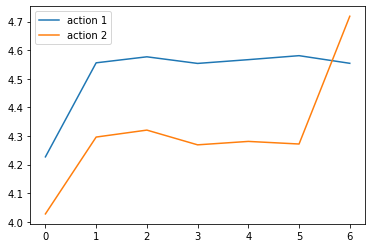

In [17]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
ax.plot(range(0,7),Q_[:,0],  label="action 1")
ax.plot( range(0,7), Q_[:,1],label="action 2")
ax.legend()

plt.show()
